In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
## drop month,day,year

df.drop(['day','month','year'],axis=1,inplace=True)

df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
## encoding

df["Classes"]=np.where(df['Classes'].str.contains("not fire"),0,1)

df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Independent And Dependent Features:


In [6]:
# independent features
x=df.drop('FWI',axis=1)

# dependent feture
y=df['FWI']

In [7]:
x.shape,y.shape

((243, 11), (243,))

In [8]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((182, 11), (182,), (61, 11), (61,))

## Feature selection based of correlation

Here we will drop the features that are highly correlated.

In [12]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

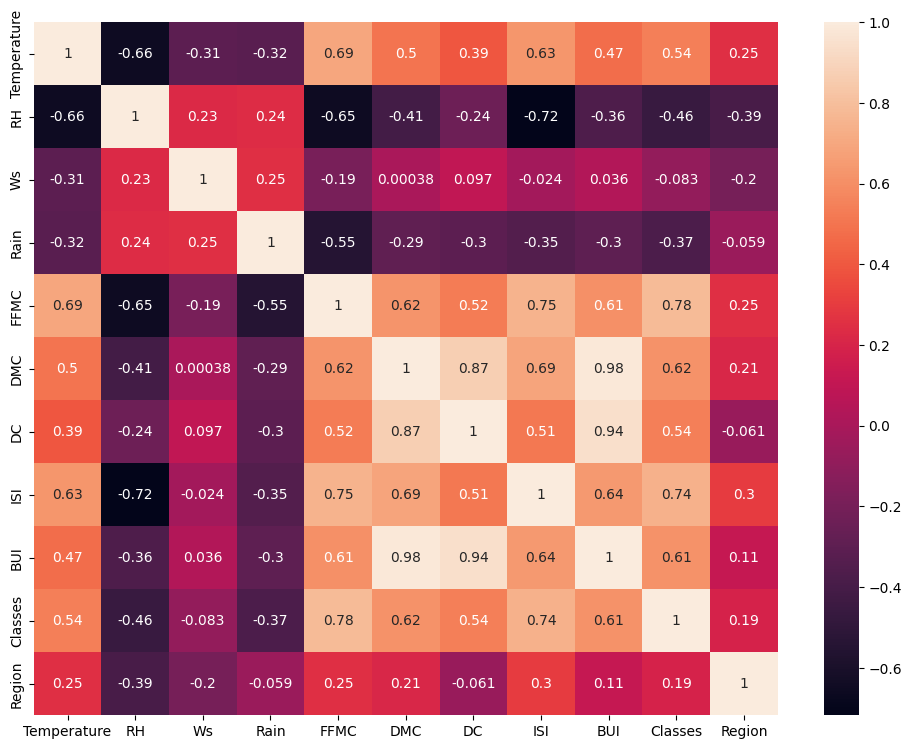

In [13]:
## check for multicollinnearity:
plt.figure(figsize=(12,9))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [14]:
## Feature selection based on correlation:

def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
correlation(x_train,0.90)

{'BUI'}

In [16]:
correlation(x_train,0.80)

{'BUI', 'DC'}

In [20]:
corr_feature=correlation(x_train,0.85)

In [21]:
## Drop the feature where correlation is more than 0.85 
x_train.drop(corr_feature,axis=1,inplace=True)
x_test.drop(corr_feature,axis=1,inplace=True)



In [22]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization:

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [24]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [25]:
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'x_train after scaling')

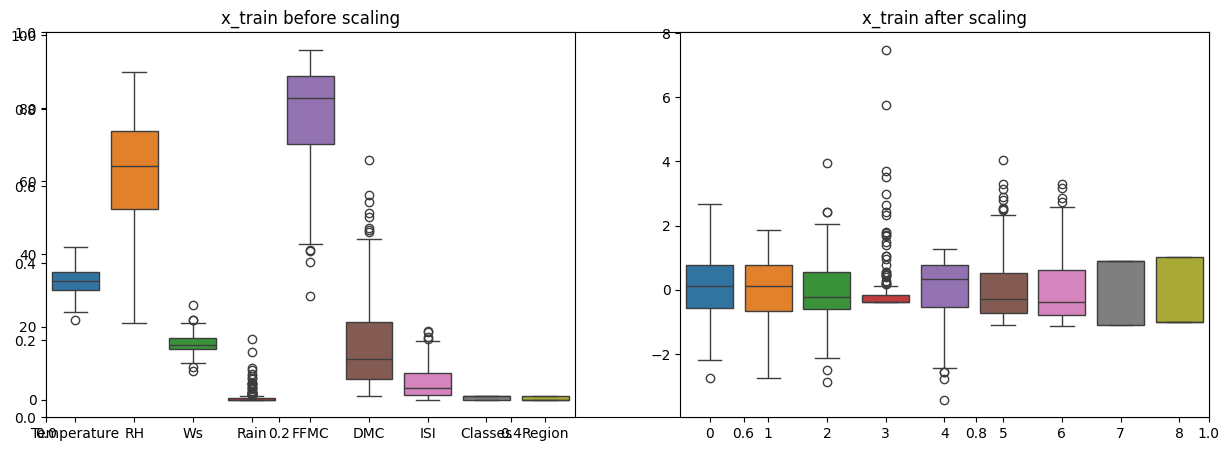

In [29]:
## Box plot to understand effect of standard scaler:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")

plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling")


## MODEL TRAINING

1. Linear Regression Model.

2. Lasso Regression

3. Lasso cv

4. Ridge Regression

5. Ridge cv

6. ElasticNet Regression

7. ElasticNet cv

## 1. Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)

## Predictions for x_test_scaled
y_pred=lin_reg.predict(x_test_scaled)

y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

Mean Absolute Error 0.5468236465249978
R2 score 0.9847657384266951


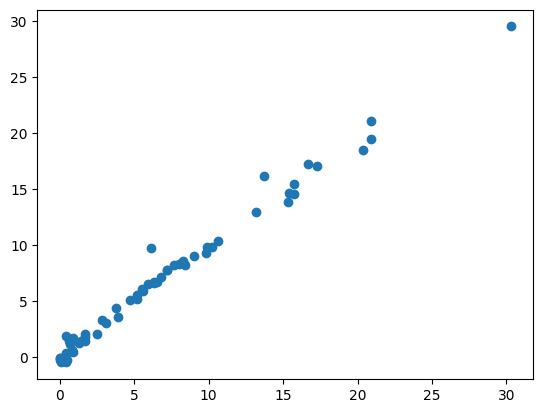

In [37]:
## performance matrics:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error",mae)
print("R2 score",score)

## visualization:

plt.scatter(y_test,y_pred)

## 2. Lasso Regression

Mean Absolute Error 1.133175994914409
R2 score 0.9492020263112388


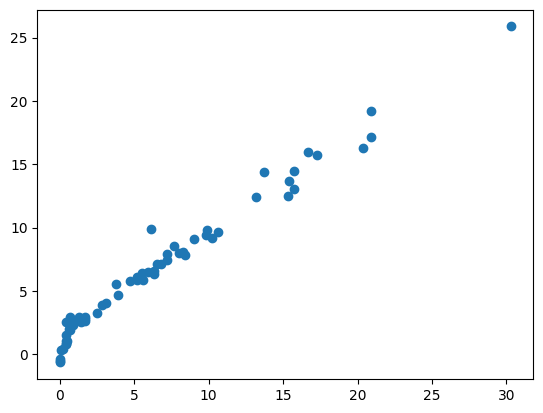

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()

lasso.fit(x_train_scaled,y_train)

## predictions
y_pred=lasso.predict(x_test_scaled)

## performance metrics
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print('Mean Absolute Error',mae)
print("R2 score",score)

# visualization
plt.scatter(y_test,y_pred)
plt.show()

## 3. Lasso cv

predictions 

[ 8.17490595  7.68312478 -0.25676525  4.72643402  6.78715772  1.77624325
  2.23148094  7.64057821  1.99176323  3.39941035  0.62808928  9.95945488
  9.36168319 16.98503659 18.28488762  1.61644108  1.62751276 -0.6415713
  7.28510526  3.10926518  1.95541903  0.18069335  6.47563129  0.14318503
 20.99597009  5.11755206  5.86208849  9.75914403 -0.77037467  9.91838577
  6.72277075 -0.31776007 10.31109643 14.4365551   1.71022677  0.83439752
  2.03414915  5.97488529 -0.6263644  -0.56200288  6.47253729  2.07971408
  8.46741557 -0.8464481  15.40443856  8.32941189  8.48782486  1.44030355
 13.02752812  1.20911545 29.08623849  5.49737681 17.15937199 19.28890096
 13.71102991 16.05355549  0.99056448  9.0873725   3.84455993 14.43991192
  5.23034139]
----------------------------------------------------
Mean Absolute Error 0.619970115826343
R2 score 0.9820946715928275


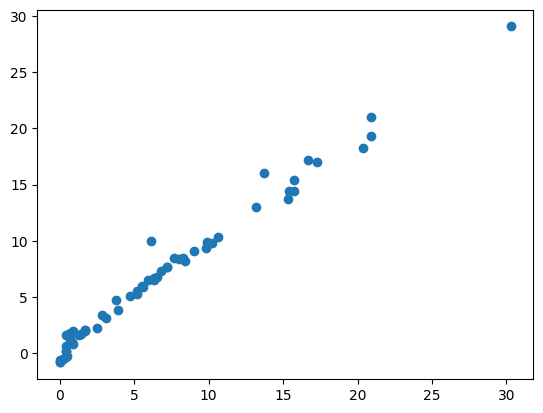

In [52]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score

lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

## predictions
print("predictions \n")

y_pred=lassocv.predict(x_test_scaled)
print(y_pred)

print('----------------------------------------------------')

# performance metrics
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error",mae)
print("R2 score",score)

# visualization
plt.scatter(y_test,y_pred)
plt.show()

## 4. Ridge Regression

mean absoute error 0.5642305340105715
R2 score 0.9842993364555512


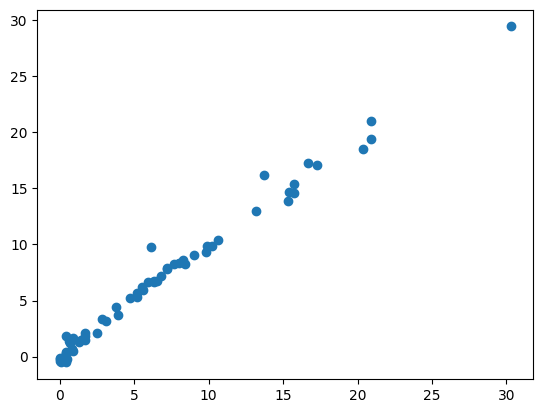

In [54]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(x_train_scaled,y_train)

y_pred=ridge.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("mean absoute error",mae)
print("R2 score",score)

plt.scatter(y_test,y_pred)
plt.show()

## 5.Ridge cv

mean absolute error : 0.5642305340105715
R2 score :  0.9842993364555512


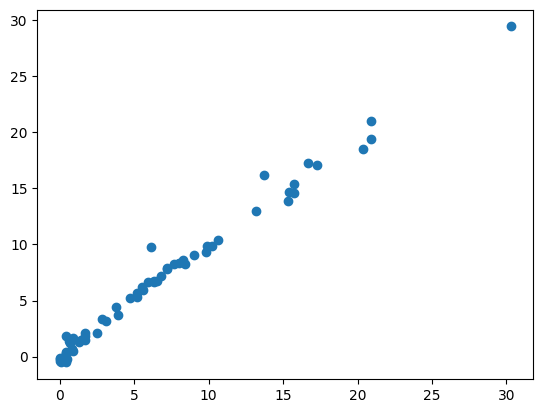

In [55]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score

ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)

y_pred=ridgecv.predict(x_test_scaled)

plt.scatter(y_test,y_pred)


mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("mean absolute error :",mae)
print('R2 score : ',score)


## 6.ElasticNet Regression


mean absoute error 1.8822353634896005
R2 score 0.8753460589519703


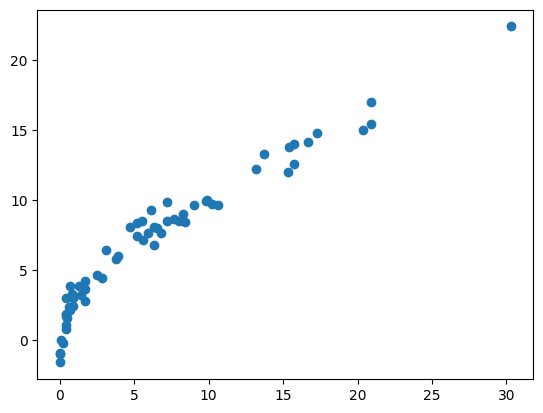

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)

y_pred=elastic.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("mean absoute error",mae)
print("R2 score",score)

plt.scatter(y_test,y_pred)

## 7.ElasticNet cv

mean absolute error : 0.6575946731430898
R2 score :  0.9814217587854941


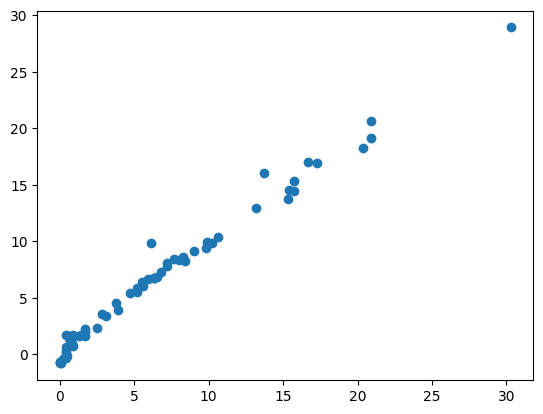

In [57]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)

elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)

plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("mean absolute error :",mae)
print('R2 score : ',score)


## PICKLING

As the ridge regression has the better accuracy, we need to store it as a pickle file

Also we convert scaler= standardscaler to pickle format


In [58]:
scaler

StandardScaler()

In [59]:
ridge

Ridge()

In [60]:
## importing the pickle module:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

## NOTE

DATA SET= Algerian Forest Fire Dataset

we have done the basic steps:

Data Cleaning.

EDA And Feature Engineering.

Feature Selection.

Model Training

Cross Validation/Hyper parameter tuning

we now convert it into an end-to-end project




